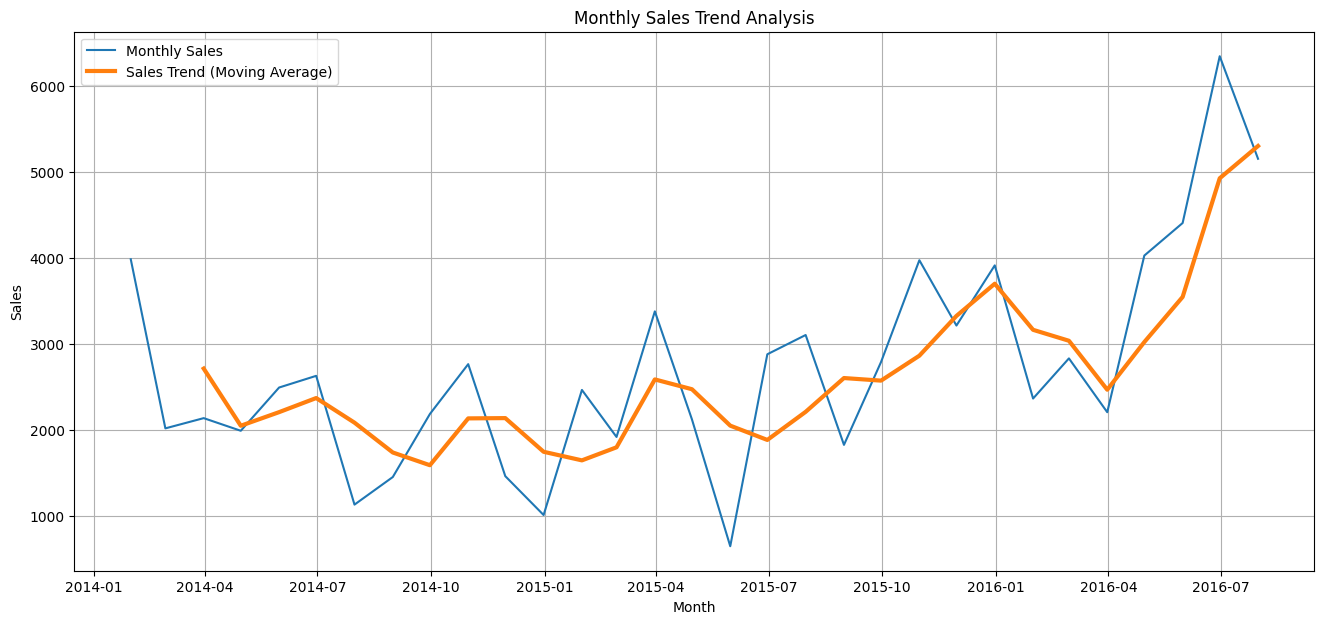

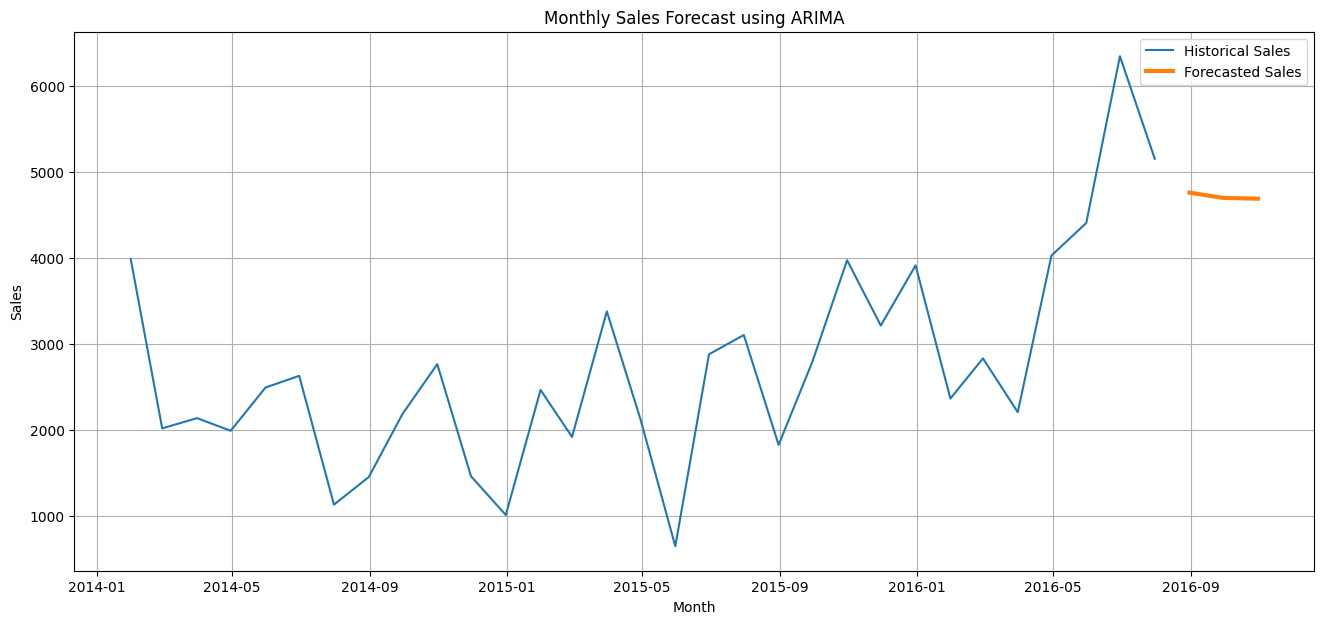

Forecasted Monthly Sales:
2016-08-31    4759.559093
2016-09-30    4699.063552
2016-10-31    4689.785330
Freq: ME, Name: predicted_mean, dtype: float64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


# 1. Load Dataset

data = pd.read_csv("/content/mock_kaggle.csv")

# Date preprocessing
data['data'] = pd.to_datetime(data['data'])
data.set_index('data', inplace=True)

# 2. Monthly Sales Calculation

monthly_sales = data['venda'].resample('ME').sum()

# 3. TREND ANALYTICS
trend = monthly_sales.rolling(window=3).mean()

plt.figure(figsize=(16, 7))
plt.plot(monthly_sales, label="Monthly Sales")
plt.plot(trend, label="Sales Trend (Moving Average)", linewidth=3)
plt.title("Monthly Sales Trend Analysis")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


# 4. TIME SERIES FORECASTING (ARIMA)

model = ARIMA(monthly_sales, order=(1,1,1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=3)

plt.figure(figsize=(16, 7))
plt.plot(monthly_sales, label="Historical Sales")
plt.plot(forecast, label="Forecasted Sales", linewidth=3)
plt.title("Monthly Sales Forecast using ARIMA")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

print("Forecasted Monthly Sales:")
print(forecast)
